In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [18]:

# Initialize video capture
cap = cv2.VideoCapture('Worm1.avi')

# Read the first frame
ret, frame = cap.read()
if not ret:
    print("Failed to read video")
    cap.release()
    exit()

# Convert to float for accumulateWeighted
avg_frame = np.float32(frame)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Update the running average
    cv2.accumulateWeighted(frame, avg_frame, alpha=0.01)

    # Convert back to uint8
    result = cv2.convertScaleAbs(avg_frame)

    # Display the result
    cv2.imshow('Frame Averaging', result)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
def sample_frames(video_path, num_frames):
    """
    Sample evenly spaced frames from a video file.

    Args:
        video_path (str): Path to the video file.
        num_frames (int): Number of frames to sample.

    Returns:
        list: List of sampled grayscale frames.
    """
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if num_frames > total_frames:
        num_frames = total_frames

    interval = total_frames / num_frames

    for i in range(num_frames):
        frame_idx = int(i * interval)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if ret:
            if len(frame.shape) == 3:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame)
    cap.release()
    return frames

def average_frames(frames, alpha=0.5):
    """
    Apply frame averaging using cv2.accumulateWeighted.

    Args:
        frames (list of numpy.ndarray): List of grayscale frames.
        alpha (float): Weight for the accumulateWeighted function.

    Returns:
        numpy.ndarray: Averaged frame.
    """
    if not frames:
        return None

    avg_frame = frames[0].astype(np.float32)

    for frame in frames[1:]:
        cv2.accumulateWeighted(frame, avg_frame, alpha)

    return cv2.convertScaleAbs(avg_frame)

In [5]:
frames =  sample_frames('Worm1.avi', 50)
# for frame in frames:
#     plt.imshow(frame, cmap='gray')
#     plt.show()
# result = average_frames(frames, alpha=0.05)
# plt.imshow(result, cmap='gray')


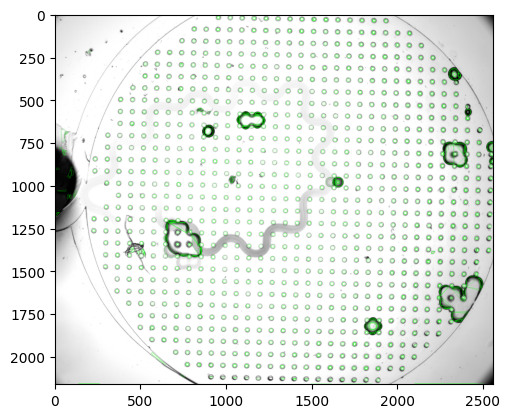

In [6]:
# blur = cv2.GaussianBlur(result, (5, 5), 0)
# plt.imshow(blur, cmap='gray')
MSER = cv2.MSER_create()
regions, _ = MSER.detectRegions(result)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(result, hulls, 1, (0, 255, 0))

plt.imshow(result, cmap='gray')

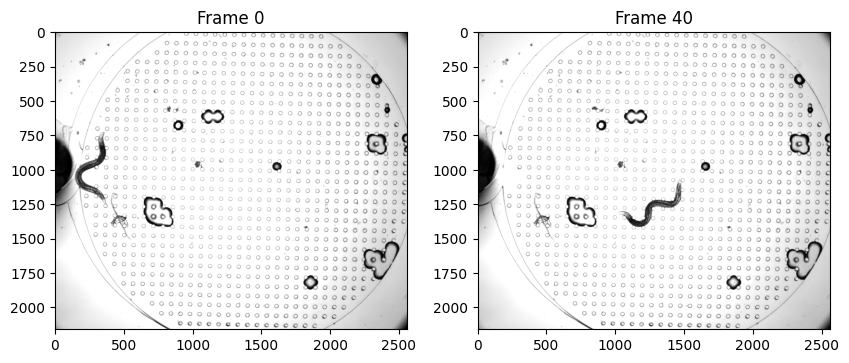

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(frames[0], cmap='gray')
plt.title('Frame 0')

plt.subplot(1, 2, 2)
plt.imshow(frames[40], cmap='gray')
plt.title('Frame 40')

plt.show()

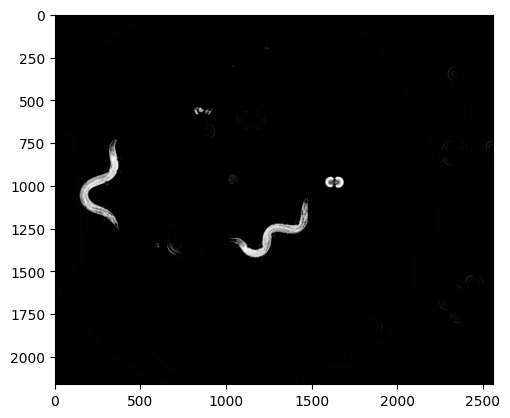

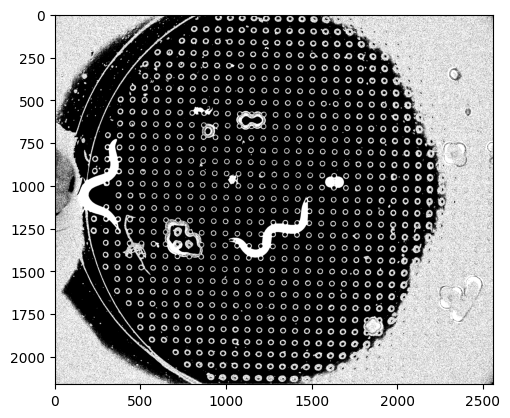

In [8]:
frameA = frames[0].copy()
frameB = frames[40].copy()

# Calculate the absolute difference
diff = cv2.absdiff(frameA, frameB)
plt.imshow(diff, cmap='gray')
plt.show()

# Threshold the difference to highlight changes
_, binary_diff = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY)

plt.imshow(binary_diff, cmap='gray')
plt.show()

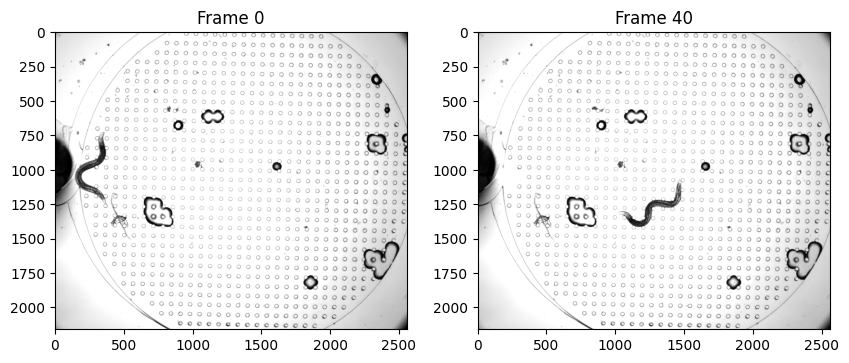

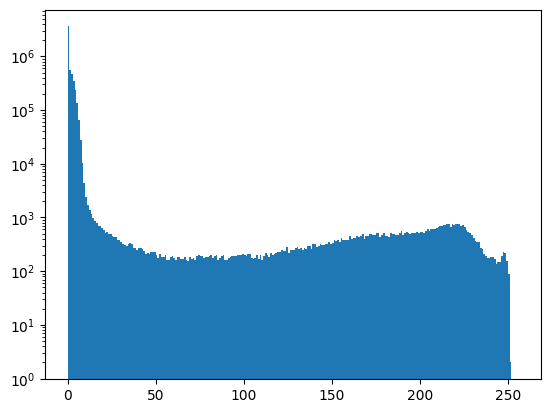

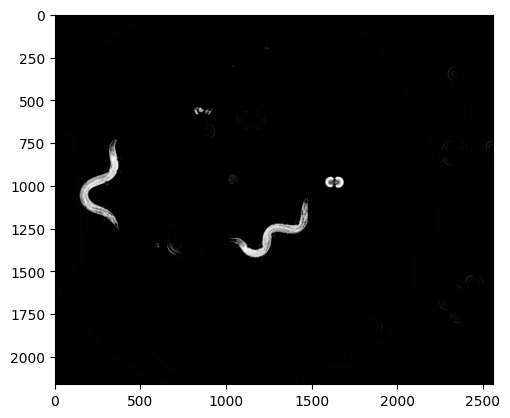

In [9]:
frames =  sample_frames('Worm1.avi', 50)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(frames[0], cmap='gray')
plt.title('Frame 0')

plt.subplot(1, 2, 2)
plt.imshow(frames[40], cmap='gray')
plt.title('Frame 40')

plt.show()

frameA = frames[0].copy()
frameB = frames[40].copy()

# Calculate the absolute difference
diff = cv2.absdiff(frameA, frameB)
hist = plt.hist(diff.ravel(), bins=256, range=[0, 256], log=True)
plt.show()

plt.imshow(diff, cmap='gray')
plt.show()

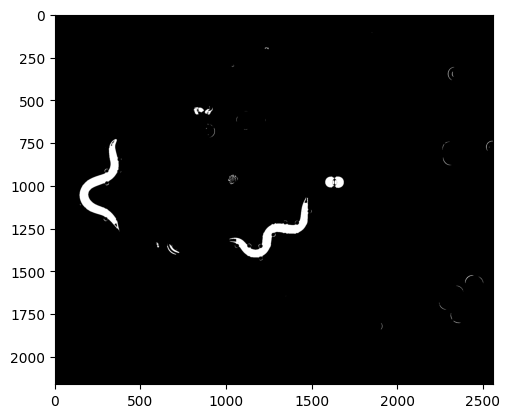

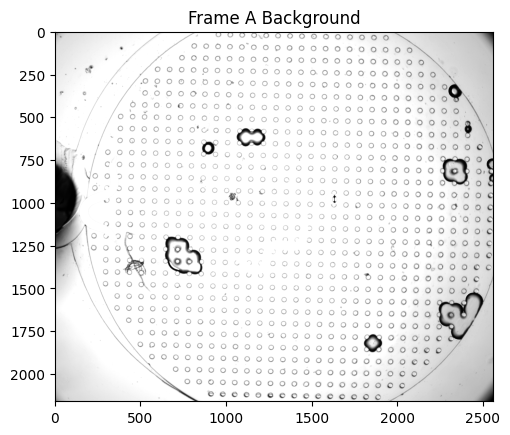

In [10]:
thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='gray')
plt.show()

frameAbackground = frameA.copy()
frameAbackground[thresh == 255] = 255
# Display the modified frameAbackground
plt.imshow(frameAbackground, cmap='gray')
plt.title('Frame A Background')
plt.show()


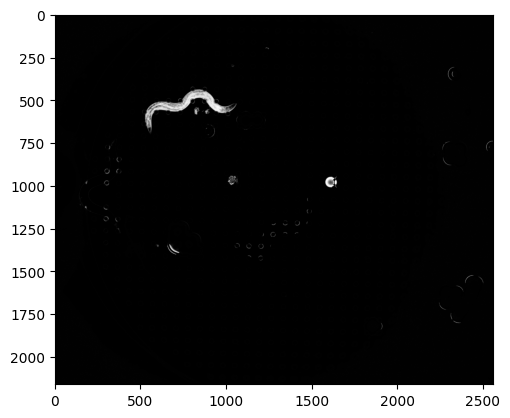

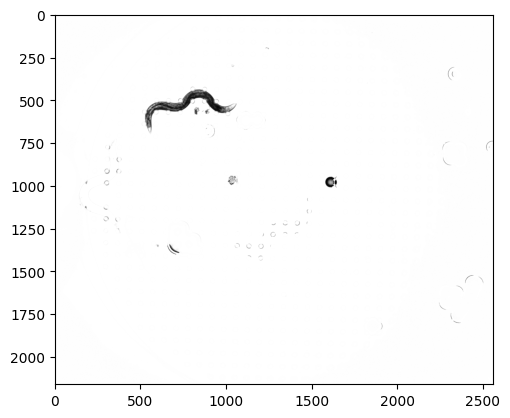

In [22]:
frameC = frames[10].copy()
diff1 = cv2.absdiff(frameAbackground, frameC)
plt.imshow(diff1, cmap='gray')
plt.show()
diff1inversed = cv2.bitwise_not(diff1)
plt.imshow(diff1inversed, cmap='gray')
plt.show()

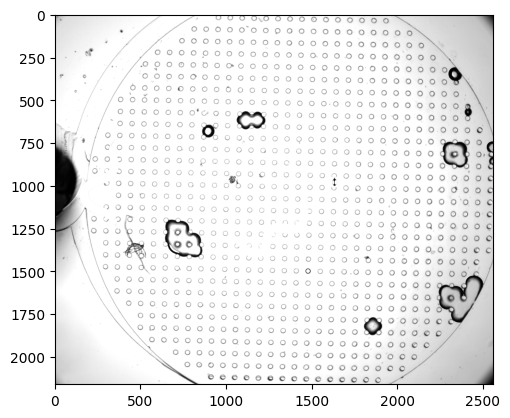

In [23]:
circletest = frameAbackground.copy()
cv2.circle(circletest, (1475, 1500), 13, (0, 0, 0), 2)
plt.imshow(circletest, cmap='gray')
plt.show()

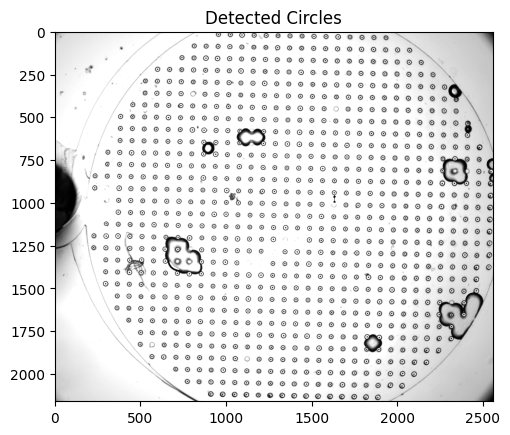

In [24]:
circletest = frameAbackground.copy()
image = cv2.medianBlur(circletest, 5)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    image,                # Input image (grayscale)
    cv2.HOUGH_GRADIENT,   # Detection method
    dp=1.2,               # Inverse ratio of the accumulator resolution to the image resolution
    minDist=20,          # Minimum distance between the centers of detected circles
    param1=60,            # Higher threshold for the Canny edge detector
    param2=30,            # Accumulator threshold for circle detection
    minRadius=10,          # Minimum circle radius
    maxRadius=15           # Maximum circle radius
)

# If circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(image, (x, y), r, (0, 0, 0), 2)
        cv2.circle(image, (x, y), 2, (0, 0, 0), 3)

    plt.imshow(image, cmap='gray')
    plt.title('Detected Circles')
    plt.show()

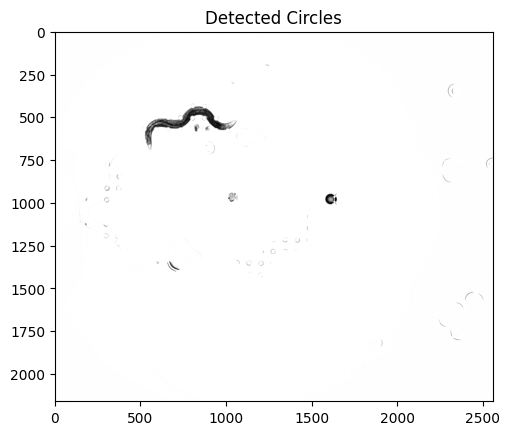

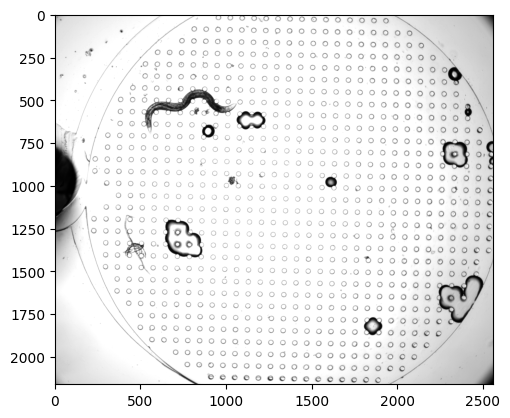

In [26]:
circletest = frameAbackground.copy()
image = cv2.medianBlur(circletest, 5)
clean = diff1inversed.copy()
# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    image,                # Input image (grayscale)
    cv2.HOUGH_GRADIENT,   # Detection method
    dp=1.2,               # Inverse ratio of the accumulator resolution to the image resolution
    minDist=20,          # Minimum distance between the centers of detected circles
    param1=60,            # Higher threshold for the Canny edge detector
    param2=30,            # Accumulator threshold for circle detection
    minRadius=10,          # Minimum circle radius
    maxRadius=15           # Maximum circle radius
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(clean, (x, y), r-1, (255, 255, 255), 2)

    plt.imshow(clean, cmap='gray')
    plt.title('Detected Circles')
    plt.show()

plt.imshow(frames[10], cmap='gray')
plt.show()

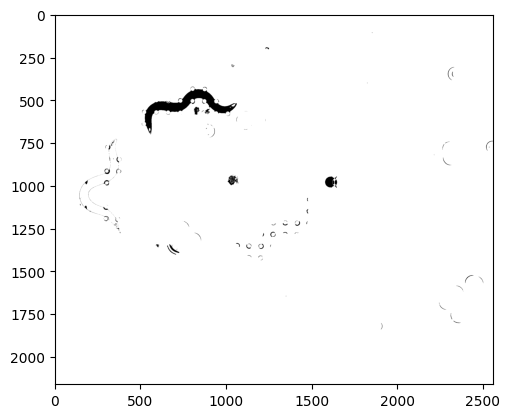

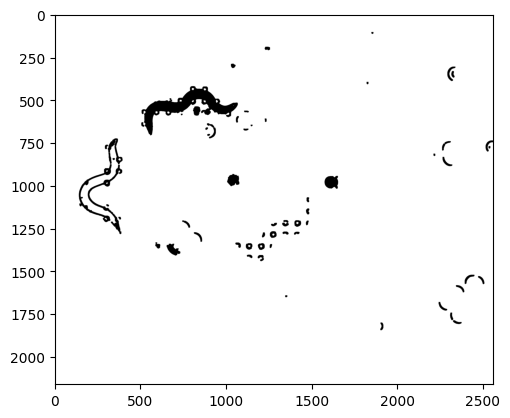

TypeError: Cannot interpret '1' as a data type

In [ ]:
cleanThreshed = cv2.threshold(clean, 240, 255, cv2.THRESH_BINARY)[1]
plt.imshow(cleanThreshed, cmap='gray')
plt.show()
cleanInverted = cv2.bitwise_not(cleanThreshed)
# cleanClosed = cv2.morphologyEx(cleanThreshed, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4)),iterations=6)
# plt.imshow(cleanClosed, cmap='gray')
# plt.show()
# cleanDilated = cv2.morphologyEx(cleanClosed, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4)),iterations=6)
# plt.imshow(cleanDilated, cmap='gray')
# plt.show()
# cleanEroded = cv2.morphologyEx(cleanThreshed, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4)),iterations=3)
# plt.imshow(cleanEroded, cmap='gray')
# plt.show()
# cleanDilated = cv2.morphologyEx(cleanEroded, cv2.MORPH_DILATE, np.ones((3, 3)), iterations=3)
# plt.imshow(cleanDilated, cmap='gray')
# plt.show()

In [ ]:
cv2.imwrite('frame10.png', frames[10])

True

: 